# 整理堵塞数据

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#准备文件夹保存数据
local_path=os.getcwd()
if not os.path.exists(local_path+'\\blokagedata'):
    os.mkdir(local_path+'\\blokagedata')
print(local_path+'\\blokagedata')
#指定Block数据文件夹
file_path='C:\\Users\\XDHHome\\Desktop\\Block'

F:\NBCode\Blockage\blokagedata


## 整理样本标签

In [9]:
# 获取SamplePipeBlock中的管道编号
for i in tqdm(range(24)):
    Pipe_code=pd.read_csv(file_path+'\\net3-'+str(i)+'\\SamplePipeBlock.csv',header=0)
    Pipe_code=Pipe_code.loc[:,'Code'].astype(int)-505000000
    Pipe_code.to_csv(local_path+'\\blokagedata\\Pipe_code_'+str(i)+'.csv',encoding='ascii')
#获取SamplePipeBlock中的管道管径
for i in tqdm(range(24)):
    Pipe_dn=pd.read_csv(file_path+'\\net3-0\\SamplePipeBlock.csv',header=0,usecols=[3])
    Pipe_dn.to_csv(local_path+'\\blokagedata\\Pipe_dn_'+str(i)+'.csv',encoding='ascii')
#获取时间节点
for i in tqdm(range(24)):
    Pipe_time=pd.DataFrame(np.ones([1160,1])*i).astype(int)
    Pipe_time.to_csv(local_path+'\\blokagedata\\Pipe_time_'+str(i)+'.csv',encoding='ascii')
#去掉没有模拟结果的样本
for i in tqdm(range(24)):
    num=[ ]
    for j in range(1,1161):
        if not os.path.exists(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Pipe.csv'):
            num.append(j-1)
    for name in ['code','dn','time']:
        data=pd.read_csv(local_path+'\\blokagedata\\Pipe_'+name+'_'+str(i)+'.csv',header=0,usecols=[1])
        data=data.drop(index=num)
        data.to_csv(local_path+'\\blokagedata\\Pipe_'+name+'_clear_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:01<00:00, 15.40it/s]


In [13]:
#合并24组数据
for name in ['code','dn','time']:
    data=pd.read_csv(local_path+'\\blokagedata\\Pipe_'+name+'_clear_0.csv',header=0)
    for i in tqdm(range(1,24)):
        data1=pd.read_csv(local_path+'\\blokagedata\\Pipe_'+name+'_clear_'+str(i)+'.csv',header=0)
        data=data.append(data1)
    data.to_csv(local_path+'\\blokagedata\\Pipe_'+name+'_clear_'+'24.csv',encoding='ascii',index=False)

100%|██████████| 23/23 [00:00<00:00, 795.99it/s]


In [14]:
#把管道编号重编为连续整数
data=pd.read_csv(local_path+'\\blokagedata\\Pipe_code_clear_24.csv',header=0)
y=data.astype(int)
table1=np.sort(np.unique(y))
for i in tqdm(range(len(table1))):
    for j in range(len(y)):
        if y.iloc[j].item()==table1[i].item():
            y.iloc[j]=i
y.to_csv(local_path+'\\blokagedata\\Pipe_code_clear_24_sorted.csv',encoding='ascii',index=False)

100%|██████████| 116/116 [03:13<00:00,  1.67s/it]


In [27]:
#合并三组标签
a=pd.read_csv(local_path+'\\blokagedata\\Pipe_code_clear_24_sorted.csv',header=0)
b=pd.read_csv(local_path+'\\blokagedata\\Pipe_dn_clear_24.csv',header=0)
c=pd.read_csv(local_path+'\\blokagedata\\Pipe_time_clear_24.csv',header=0)
abc=pd.concat([a,b,c],axis=1)
abc.columns=['code','dn','time']
abc.to_csv(local_path+'\\blokagedata\\Sample_label.csv',encoding='ascii',index=False)

## 整理样本数据

In [159]:
#将每个时间点的Sink整理成样本
for i in tqdm(range(24)):
    sample=pd.DataFrame()
    for j in range(1,1161):
        if os.path.exists(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv'):
            sample2=pd.read_csv(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv',header=0,usecols=[2])
            sample2=sample2.drop(index=[0,1,2]).T
            sample=pd.concat([sample,sample2],axis=0)
    sample.to_csv(local_path+'\\blokagedata\\Sample_Sink_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:45<00:00,  1.90s/it]


In [160]:
#将每个时间点的Tank整理成样本
for i in tqdm(range(24)):
    sample=pd.DataFrame()
    for j in range(1,1161):
        if os.path.exists(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv'):
            sample2=pd.read_csv(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv',header=0,usecols=[4],nrows=3)
            sample2=sample2.T
            sample=pd.concat([sample,sample2],axis=0)
    sample.to_csv(local_path+'\\blokagedata\\Sample_Tank_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:34<00:00,  1.44s/it]


In [164]:
#将每个时间点的Source整理成样本
for i in tqdm(range(24)):
    sample=pd.DataFrame()
    for j in range(1,1161):
        if os.path.exists(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sources.csv'):
            sample2=pd.read_csv(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sources.csv',header=0,usecols=[4])
            sample2=sample2.T
            sample=pd.concat([sample,sample2],axis=0)
    sample.to_csv(local_path+'\\blokagedata\\Sample_Source_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:34<00:00,  1.45s/it]


In [167]:
#合并数据
for i in tqdm(range(24)):
    Sinksample=pd.read_csv(local_path+'\\blokagedata\\Sample_Sink_'+str(i)+'.csv',header=0)
    Tanksample=pd.read_csv(local_path+'\\blokagedata\\Sample_Tank_'+str(i)+'.csv',header=0)
    Sourcesample=pd.read_csv(local_path+'\\blokagedata\\Sample_Source_'+str(i)+'.csv',header=0)
    abc=pd.concat([Sinksample,Tanksample,Sourcesample],axis=1)
    abc.columns=range(0,96)
    abc.to_csv(local_path+'\\blokagedata\\Sample_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:03<00:00,  6.70it/s]


In [169]:
#合并24组数据
sample=pd.DataFrame()
for i in tqdm(range(0,24)):
    sample2=pd.read_csv(local_path+'\\blokagedata\\Sample_'+str(i)+'.csv',header=0)
    sample=pd.concat([sample,sample2],axis=0)
sample.to_csv(local_path+'\\blokagedata\\Sample_24.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:00<00:00, 36.79it/s]


In [53]:
#合并样本和标签
a=pd.read_csv(local_path+'\\blokagedata\\Sample_24.csv',header=0)
b=pd.read_csv(local_path+'\\blokagedata\\Sample_label.csv',header=0)
ab=pd.concat([a,b],axis=1)
ab.to_csv(local_path+'\\blokagedata\\Block_Sample.csv',encoding='ascii',index=False)

## 整理正常数据

In [154]:
for i in tqdm(range(24)):
    #将每个时间点的Sink整理成样本
    sample=pd.read_csv(file_path+'\\net3-'+str(i)+'\\Result.0.Sinks.csv',header=0,usecols=[2])
    sample=sample.drop(index=[0,1,2]).T
    sample.to_csv(local_path+'\\blokagedata\\Normal_Sample_Sink_'+str(i)+'.csv',encoding='ascii',index=False)
    #将每个时间点的Tank整理成样本
    sample=pd.read_csv(file_path+'\\net3-'+str(i)+'\\Result.0.Sinks.csv',header=0,usecols=[4],nrows=3)
    sample=sample.T
    sample.to_csv(local_path+'\\blokagedata\\Normal_Sample_Tank_'+str(i)+'.csv',encoding='ascii',index=False)
    #将每个时间点的Source整理成样本
    sample=pd.read_csv(file_path+'\\net3-'+str(i)+'\\Result.0.Sources.csv',header=0,usecols=[4])
    sample=sample.T
    sample.to_csv(local_path+'\\blokagedata\\Normal_Sample_Source_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:00<00:00, 180.93it/s]


In [155]:
#合并数据
for i in tqdm(range(24)):
    Sinksample=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_Sink_'+str(i)+'.csv',header=0)
    Tanksample=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_Tank_'+str(i)+'.csv',header=0)
    Sourcesample=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_Source_'+str(i)+'.csv',header=0)
    abcd=pd.concat([Sinksample,Tanksample,Sourcesample],axis=1)
    abcd.columns=range(0,96)
    abcd.to_csv(local_path+'\\blokagedata\\Normal_Sample_'+str(i)+'.csv',encoding='ascii',index=False)

100%|██████████| 24/24 [00:00<00:00, 73.37it/s]


In [156]:
#合并24组数据
sample=pd.DataFrame()
for i in tqdm(range(1,24)):
    sample2=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_'+str(i)+'.csv',header=0)
    sample=pd.concat([sample,sample2],axis=0)
sample.to_csv(local_path+'\\blokagedata\\Normal_Sample_24.csv',encoding='ascii',index=False)

100%|██████████| 23/23 [00:00<00:00, 132.54it/s]


In [38]:
#生成标签
a=pd.DataFrame(np.ones([24,1])*116).astype(int)
b=pd.DataFrame(np.ones([24,1])*0).astype(int)#由于0%管径无模拟数据，所以用来指代正常数据
c=pd.DataFrame(range(0,24))
abc=pd.concat([a,b,c],axis=1)
abc.columns=['code','dn','time']
abc.to_csv(local_path+'\\blokagedata\\Normal_Sample_label.csv',encoding='ascii',index=False)

In [46]:
#合并样本和标签
a=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_24.csv',header=0)
b=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_label.csv',header=0)
ab=pd.concat([a,b],axis=1)
ab.to_csv(local_path+'\\blokagedata\\Normal_Sample.csv',encoding='ascii',index=False)

In [49]:
#过采样
a=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample.csv',header=0)
b=a
for i in range(8):
    a=a.append(b)
a.to_csv(local_path+'\\blokagedata\\Normal_Sample_oversample.csv',encoding='ascii',index=False)

## 堵塞+正常

In [56]:
#合并三组标签
a=pd.read_csv(local_path+'\\blokagedata\\Block_Sample.csv',header=0)
b=pd.read_csv(local_path+'\\blokagedata\\Normal_Sample_oversample.csv',header=0)
ab=pd.concat([a,b],axis=0)
ab.to_csv(local_path+'\\blokagedata\\Sample.csv',encoding='ascii',index=False)

## 一口气版

In [146]:
col_l=pd.DataFrame()#label
col_b=pd.DataFrame()#block
col_n=pd.DataFrame()#normal
for i in tqdm(range(24)):
    # 获取SamplePipeBlock中的管道编号
    Pipe_code=pd.read_csv(file_path+'\\net3-'+str(i)+'\\SamplePipeBlock.csv',header=0)
    Pipe_code=Pipe_code.loc[:,'Code'].astype(int)-505000000
    #获取SamplePipeBlock中的管道管径比例
    Pipe_dn=pd.read_csv(file_path+'\\net3-0\\SamplePipeBlock.csv',header=0,usecols=[3])#事先在该文件里生成了一列数据
    #获取时间节点
    Pipe_time=pd.DataFrame(np.ones([1160,1])*i).astype(int)
    #去掉没有模拟结果的样本
    num=[ ]
    for j in range(1,1161):
        if not os.path.exists(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Pipe.csv'):
            num.append(j-1)
    Pipe_code=Pipe_code.drop(index=num)
    Pipe_dn=Pipe_dn.drop(index=num)
    Pipe_time=Pipe_time.drop(index=num)
    cat=pd.concat([Pipe_code,Pipe_dn,Pipe_time],axis=1)
    col_l=pd.concat([col_l,cat],axis=0)
    #获取堵塞数据
    for j in range(1,1161):
        if os.path.exists(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv'):
            sink=pd.read_csv(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv',header=0,usecols=[2]).drop(index=[0,1,2]).T.reset_index(drop=True)
            tank=pd.read_csv(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sinks.csv',header=0,usecols=[4],nrows=3).T.reset_index(drop=True)
            source=pd.read_csv(file_path+'\\net3-'+str(i)+'\\RsBlock\\Sample-Pipe-'+str(j)+'.Sources.csv',header=0,usecols=[4]).T.reset_index(drop=True)
            cat=pd.concat([sink,tank,source],axis=1)
            col_b=pd.concat([col_b,cat],axis=0)
    #获取正常数据
    sink=pd.read_csv(file_path+'\\net3-'+str(i)+'\\Result.0.Sinks.csv',header=0,usecols=[2]).drop(index=[0,1,2]).T.reset_index(drop=True)
    tank=pd.read_csv(file_path+'\\net3-'+str(i)+'\\Result.0.Sinks.csv',header=0,usecols=[4],nrows=3).T.reset_index(drop=True)
    source=pd.read_csv(file_path+'\\net3-'+str(i)+'\\Result.0.Sources.csv',header=0,usecols=[4]).T.reset_index(drop=True)
    cat=pd.concat([sink,tank,source],axis=1)
    col_n=pd.concat([col_n,cat],axis=0)
#命名列名
col_l=col_l.reset_index(drop=True) 
col_l.columns=['code','dn','time']
col_b=col_b.reset_index(drop=True)
col_b.columns=range(0,96)
col_n=col_n.reset_index(drop=True)
col_n.columns=range(0,96)
#把管道编号重编为连续整数
y=col_l.loc[:,'code'].astype(int)
table=np.sort(np.unique(y))
for i in tqdm(range(len(table))):
    for j in range(len(y)):
        if y.iloc[j].item()==table[i].item():
            y.iloc[j]=i
col_l.loc[:,'code']=y
#生成正常样本的标签
code_n=pd.DataFrame(np.ones([24,1])*116).astype(int)
dn_n=pd.DataFrame(np.ones([24,1])*0).astype(int)#由于0%管径无模拟数据，所以用来指代正常数据
time_n=pd.DataFrame(range(0,24))
cat_nl=pd.concat([code_n,dn_n,time_n],axis=1)
cat_nl.columns=['code','dn','time']
#合并样本和标签
sample_b=pd.concat([col_b,col_l],axis=1)
sample_n=pd.concat([col_n,cat_nl],axis=1)
#合并堵塞和正常数据，并过采样
for i in range(9):
    sample_b=pd.concat([sample_b,sample_n],axis=0)
sample_b=sample_b.reset_index(drop=True)
sample_b.to_csv(local_path+'\\blokagedata\\Sample.csv',encoding='ascii',index=False)

100%|██████████| 116/116 [00:17<00:00,  6.64it/s]


# 常规思路（117）

In [ ]:
只考虑堵塞或者不堵塞

## 训练ANN模型

### import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
from torch.optim import Adam,AdamW
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import DataLoader
from prefetch_generator import BackgroundGenerator
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pyplot as plt 
import hiddenlayer as hl
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer,RobustScaler
from sklearn.metrics import accuracy_score
import lightgbm as lgb
#准备文件夹保存数据
local_path=os.getcwd()
if not os.path.exists(local_path+'\\blokagedata'):
    os.mkdir(local_path+'\\blokagedata')
print(local_path+'\\blokagedata')
#判断是否可以使用GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

F:\NBCode\1-Blockage\blokagedata


In [ ]:
class DataLoaderX(DataLoader):
    def __iter__(self):
        return BackgroundGenerator(super().__iter__())
#ANN
class ANN(nn.Module):
    def __init__(self,d1,hidden_size,d2):
        super(ANN,self).__init__()
        self.ann=nn.Sequential(nn.BatchNorm1d(d1,momentum=0.5),
                               nn.Linear(d1,hidden_size),
                               nn.LeakyReLU(),
                               nn.BatchNorm1d(hidden_size,momentum=0.5),
                               nn.Linear(hidden_size,d2),
                               nn.LeakyReLU()
                              )
    def forward(self,x):
        x = self.ann(x)
        return x
#训练模型
def anntrain(args):
    model=ANN(d1=args['d1'],hidden_size=args['hidden_size'],d2=args['d2']).to(device)
    criterion=nn.CrossEntropyLoss().to(device)
    optimizer=AdamW(model.parameters(),lr=args['learning_rate'],weight_decay=args['weight_decay'])
    scheduler=LambdaLR(optimizer,verbose=False,lr_lambda=lambda epoch:1/(epoch/100+1))
    train_loader=DataLoader(dataset=train_data,batch_size=len(x_train),
                                  shuffle=True,num_workers=0)
    history1=hl.History()
    canvas1=hl.Canvas()
    best_acc=0
    for epoch in tqdm(range(args['epoches'])):
        for step,(batch_x,batch_y) in enumerate(train_loader):
            #输出层与标签之间的误差    
            model.train()
            prediction=model(batch_x)
            loss=criterion(prediction,batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #记录误差曲线和acc曲线
            steps=epoch*len(train_loader)+step+1
            if steps%25==0:
                test_acc=score_model(x_test_tensor,y_test_tensor,model)
                best_acc=test_acc if test_acc>best_acc else best_acc
                history1.log(steps,train_loss=loss.item(),test_accuracy=test_acc)
        scheduler.step()
    with canvas1:
        canvas1.draw_plot(history1['train_loss'])
        canvas1.draw_plot(history1['test_accuracy'])
    print('train_loss:%.4f'%loss.item())
    print('test_acc:%.4f'%test_acc)
    print('best_acc:%.4f'%best_acc)
    return model,best_acc
#测试数据
def run_model(data,model):
    model.eval()
    torch.no_grad()
    prediction=model(data)
    return prediction.detach()
def score_model(x_tensor,label_tensor,model):
    x=run_model(x_tensor,model)
    x=torch.argmax(x,1).unsqueeze(1)
    score=(x==label_tensor).sum().item()/len(x)
    return score

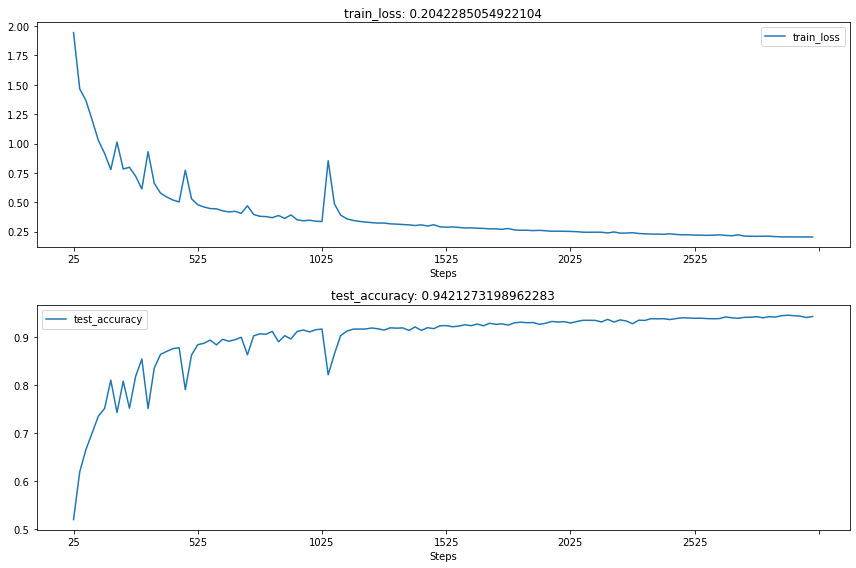

train_loss:0.2042
test_acc:0.9421
best_acc:0.9447
train_acc: 0.9617360937889748
acc: [0.9409417398244214, 0.9435242466573538, 0.9447216124526042]


 36%|███▌      | 1072/3000 [03:16<05:52,  5.46it/s]


KeyboardInterrupt: 

In [6]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample.csv',header=0)
#划分样本和标签
x=np.array(sample.iloc[:,range(0,96)])#.astype(int)
y=np.array(sample.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型
params={
"d1":96,
"hidden_size": 200,
"d2":117,
"hidden_size_range_1":200,
"hidden_size_range_2":201,
"search_step":1,
"learning_rate":0.01,
"epoches":3000,
"weight_decay":0.01
}
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
score_record=[]
hs_record=[]
hs1=params["hidden_size_range_1"]
hs2=params["hidden_size_range_2"]
sstep=params["search_step"]
for hs in range(hs1,hs2,sstep):
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)
        #numpy转为张量
        x_train_tensor=torch.from_numpy(x_train).float().to(device)
        y_train_tensor=torch.from_numpy(y_train).to(device)
        x_test_tensor=torch.from_numpy(x_test).float().to(device)
        y_test_tensor=torch.from_numpy(y_test).to(device)
        train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
        params["hidden_size"]=hs
        annmodel,best_acc=anntrain(params)
        train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    score_record.append(ave_score)
    hs_record.append(hs)
    print('score_record:',score_record)
    print('hs_record:',hs_record)

## 训练sklearn模型

### import

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold,cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform,uniform,randint
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#准备文件夹保存数据
local_path=os.getcwd()
if not os.path.exists(local_path+'\\blokagedata'):
    os.mkdir(local_path+'\\blokagedata')
print(local_path+'\\blokagedata')
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample.csv',header=0)
#改个名字
s=np.array(sample)
x=s[:,range(0,96)]#.astype(int)
y=np.array(sample.loc[:,'code']).reshape(-1,1).astype(int)

### SVM

In [ ]:
param_dist = {'svc__C': loguniform(1e2, 1e7),
 'svc__gamma': loguniform(1e-4, 1e0)}

In [2]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('svc', SVC(decision_function_shape='ovr',kernel='rbf'))])
param_dist = {'svc__C': [1010000],
 'svc__gamma': [0.02]}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=500,cv=splitter,random_state=1,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [4]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

网格搜索-度量记录： {'mean_fit_time': array([28.48837609]), 'std_fit_time': array([0.97876752]), 'mean_score_time': array([14.85825715]), 'std_score_time': array([6.29509682]), 'param_svc__gamma': masked_array(data=[0.02],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_svc__C': masked_array(data=[1010000],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'svc__gamma': 0.02, 'svc__C': 1010000}], 'split0_test_score': array([0.94313647]), 'split1_test_score': array([0.94571942]), 'split2_test_score': array([0.95210537]), 'split3_test_score': array([0.94152864]), 'split4_test_score': array([0.95050888]), 'mean_test_score': array([0.94659976]), 'std_test_score': array([0.0041007]), 'rank_test_score': array([1])}
网格搜索-最佳度量值: 0.9465997550799254
网格搜索-最佳参数： {'svc__gamma': 0.02, 'svc__C': 1010000}
网格搜索-最佳模型： Pipeline(steps=[('scaler', QuantileTransformer()),
                ('svc', SVC(C=1010000, gamma=0.02))])


In [ ]:
xx=search.cv_results_['param_svc__C'].data.astype(float)
yy=search.cv_results_['param_svc__gamma'].data.astype(float)
zz=search.cv_results_['mean_test_score'].astype(float)
xx=np.expand_dims(xx,axis=1)
yy=np.expand_dims(yy,axis=1)
zz=np.expand_dims(zz,axis=1)
print(xx.shape)
print(yy.shape)
print(zz.shape)
# pd.DataFrame(np.hstack((xx,yy,zz))).to_csv(local_path+'\\blokagedata\\svm_finetune_500.csv',encoding='ascii',index=False)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(s,y,test_size=0.2,random_state=1,stratify=y)
qt=QuantileTransformer(output_distribution = 'uniform')
x_train=X_train[:,range(0,96)]
x_test=X_test[:,range(0,96)]
x_train=qt.fit_transform(x_train)
x_test=qt.transform(x_test)
clf=SVC(decision_function_shape='ovr',kernel='rbf',C=1010000,gamma=0.02)
clf.fit(x_train,y_train.ravel())
score=clf.score(x_test,y_test.ravel())
y_pre=clf.predict(x_test)
cm=pd.DataFrame(confusion_matrix(y_test.ravel(),y_pre))
cm.to_csv(local_path+'\\blokagedata\\svm_cm.csv',encoding='ascii',index=True)

In [49]:
fo=X_test[:,range(96,99)]
wrong=fo[y_pre!=y_test.ravel()]
w=pd.DataFrame(wrong.astype(int))
wl=pd.DataFrame(y_pre[y_pre!=y_test.ravel()])
a=pd.concat([wl,w],axis=1)
a.columns=['pred','true','dn','time']
# a.to_csv(local_path+'\\blokagedata\\svm_wrong.csv',encoding='ascii',index=True)

### RandomForest

In [ ]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('rfc', RandomForestClassifier(criterion='gini',))])
param_dist = {'rfc__n_estimators': randint(10, 500),
 'rfc__min_samples_split': randint(2, 1000),
 'rfc__max_depth': randint(2, 100)}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=10,cv=splitter,random_state=11,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

In [ ]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

In [ ]:
q1=search.cv_results_['param_rfc__n_estimators'].data.astype(int)
q2=search.cv_results_['param_rfc__min_samples_split'].data.astype(int)
q3=search.cv_results_['param_rfc__max_depth'].data.astype(int)
zz=search.cv_results_['mean_test_score'].astype(float)
q1=np.expand_dims(q1,axis=1)
q2=np.expand_dims(q2,axis=1)
q3=np.expand_dims(q3,axis=1)
zz=np.expand_dims(zz,axis=1)
print(q1.shape)
print(q2.shape)
print(q3.shape)
print(zz.shape)
pd.DataFrame(np.hstack((q1,q2,q3,zz))).to_csv(local_path+'\\blokagedata\\rfc_finetune.csv',encoding='ascii',index=False)

In [ ]:
ave=[]
m=[]
for n in tqdm(range(50,150,10)):
    rfc=RandomForestClassifier(n_estimators=n,criterion='gini',max_depth=None,min_samples_split=2,n_jobs=-1)
    scores = cross_validate(rfc, x, y.ravel(), cv=splitter,scoring=('accuracy'),return_train_score=True,n_jobs=-1)
    m.append(n)
    ave.append(np.mean(scores['test_score']))

In [ ]:
rfc=RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=None,min_samples_split=2,n_jobs=-1)
rfc.fit(x_train,y_train.ravel())
score=rfc.score(x_test,y_test.ravel())
print('rfc:',score)

### KNN

In [ ]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('knn', KNeighborsClassifier())])
param_dist = {'knn__n_neighbors': [1]}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=9,cv=splitter,random_state=1,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

In [ ]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

In [ ]:
ave=[]
m=[]
for n in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=n, weights='distance',metric='minkowski', p=2)
    scores = cross_validate(knn, x, y.ravel(), cv=splitter,scoring=('accuracy'),return_train_score=True,n_jobs=-1)
    m.append(n)
    ave.append(np.mean(scores['test_score']))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2, weights='distance',metric='minkowski', p=2)
scores = cross_validate(knn, x, y.ravel(), cv=splitter,scoring=('accuracy'),return_train_score=True,n_jobs=-1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)
knn=KNeighborsClassifier(n_neighbors=1, weights='distance',metric='minkowski', p=2)
knn.fit(x_train,y_train.ravel())
score=knn.score(x_test,y_test.ravel())
print('knn:',score)

## 训练结果分析

In [ ]:
#按三个变量各自分析

# 思路1（117）

In [ ]:
训练13579管径
测试2468管径

## ANN

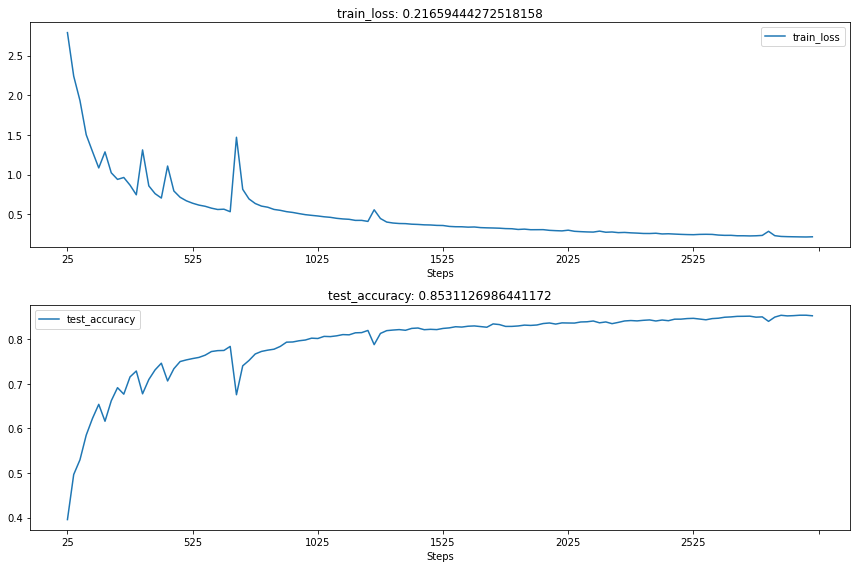

train_loss:0.2166
test_acc:0.8531
best_acc:0.8544
train_acc: 0.9570470982536603


In [7]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample.csv',header=0)
#划分样本和标签
s0=sample.iloc[np.where(sample.loc[:,'dn']==0)[0],:]
s1=sample.iloc[np.where(sample.loc[:,'dn']==1)[0],:]
s2=sample.iloc[np.where(sample.loc[:,'dn']==2)[0],:]
s3=sample.iloc[np.where(sample.loc[:,'dn']==3)[0],:]
s4=sample.iloc[np.where(sample.loc[:,'dn']==4)[0],:]
s5=sample.iloc[np.where(sample.loc[:,'dn']==5)[0],:]
s6=sample.iloc[np.where(sample.loc[:,'dn']==6)[0],:]
s7=sample.iloc[np.where(sample.loc[:,'dn']==7)[0],:]
s8=sample.iloc[np.where(sample.loc[:,'dn']==8)[0],:]
s9=sample.iloc[np.where(sample.loc[:,'dn']==9)[0],:]

s_train=pd.concat([s6,s7,s8,s9,s0],axis=0)
x_train=np.array(s_train.iloc[:,range(0,96)])

s_test=pd.concat([s1,s2,s3,s4,s5],axis=0)
x_test=np.array(s_test.iloc[:,range(0,96)])

y_train=np.array(s_train.loc[:,'code']).reshape(-1,1).astype(int)
y_test=np.array(s_test.loc[:,'code']).reshape(-1,1).astype(int)

qt = QuantileTransformer(output_distribution = 'uniform' )
x_train = qt.fit_transform(x_train)
x_test = qt.transform(x_test)
#numpy转为张量
x_train_tensor=torch.from_numpy(x_train).float().to(device)
y_train_tensor=torch.from_numpy(y_train).to(device)
x_test_tensor=torch.from_numpy(x_test).float().to(device)
y_test_tensor=torch.from_numpy(y_test).to(device)
train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
#训练模型
hs=200
params={
"d1":96,
"hidden_size": hs,
"learning_rate":0.01,
"epoches":3000,
"weight_decay":0.01
}
annmodel,best_acc=anntrain(params)
train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
print('train_acc:',train_acc)

## 结果分析

In [44]:
pre=run_model(x_test_tensor,annmodel)
pre=torch.argmax(pre,1).unsqueeze(1).cpu().numpy()
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
para=s2468.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a.to_csv(local_path+'\\blokagedata\\ann_test_result.csv',encoding='ascii',index=True)

# 思路2（117）

In [ ]:
分时间预测

## ANN

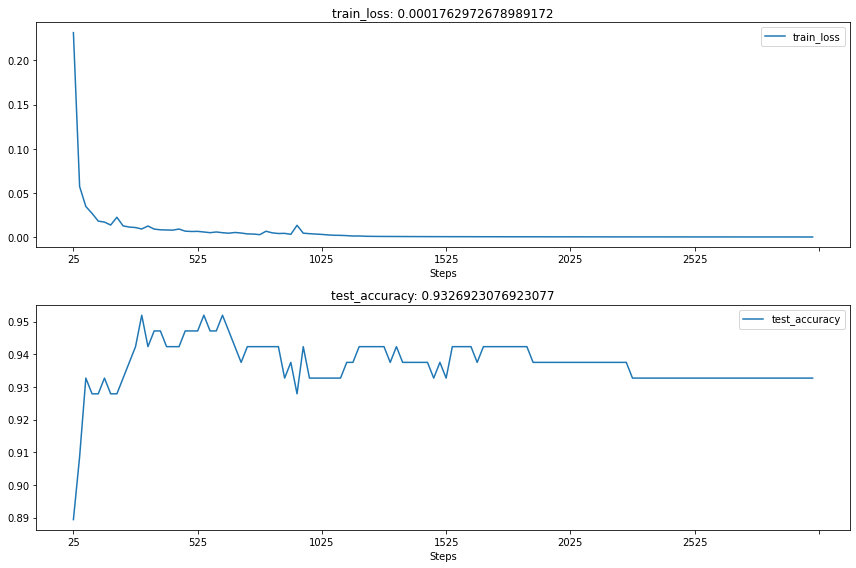

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (832). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
  0%|          | 11/3000 [00:00<00:28, 106.05it/s]

train_loss:0.0002
test_acc:0.9327
best_acc:0.9519
train_acc: 1.0
acc: [0.9326923076923077, 0.9519230769230769]


 10%|▉         | 289/3000 [00:02<00:25, 104.69it/s]


KeyboardInterrupt: 

In [3]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample.csv',header=0)
#划分样本和标签
#划分样本和标签
t00=sample.iloc[np.where(sample.loc[:,'time']==0)[0],:]
t01=sample.iloc[np.where(sample.loc[:,'time']==1)[0],:]
t02=sample.iloc[np.where(sample.loc[:,'time']==2)[0],:]
t03=sample.iloc[np.where(sample.loc[:,'time']==3)[0],:]
t04=sample.iloc[np.where(sample.loc[:,'time']==4)[0],:]
t05=sample.iloc[np.where(sample.loc[:,'time']==5)[0],:]
t06=sample.iloc[np.where(sample.loc[:,'time']==6)[0],:]
t07=sample.iloc[np.where(sample.loc[:,'time']==7)[0],:]
t08=sample.iloc[np.where(sample.loc[:,'time']==8)[0],:]
t09=sample.iloc[np.where(sample.loc[:,'time']==9)[0],:]
t10=sample.iloc[np.where(sample.loc[:,'time']==10)[0],:]
t11=sample.iloc[np.where(sample.loc[:,'time']==11)[0],:]
t12=sample.iloc[np.where(sample.loc[:,'time']==12)[0],:]
t13=sample.iloc[np.where(sample.loc[:,'time']==13)[0],:]
t14=sample.iloc[np.where(sample.loc[:,'time']==14)[0],:]
t15=sample.iloc[np.where(sample.loc[:,'time']==15)[0],:]
t16=sample.iloc[np.where(sample.loc[:,'time']==16)[0],:]
t17=sample.iloc[np.where(sample.loc[:,'time']==17)[0],:]
t18=sample.iloc[np.where(sample.loc[:,'time']==18)[0],:]
t19=sample.iloc[np.where(sample.loc[:,'time']==19)[0],:]
t20=sample.iloc[np.where(sample.loc[:,'time']==20)[0],:]
t21=sample.iloc[np.where(sample.loc[:,'time']==21)[0],:]
t22=sample.iloc[np.where(sample.loc[:,'time']==22)[0],:]
t23=sample.iloc[np.where(sample.loc[:,'time']==23)[0],:]

x=np.array(t00.iloc[:,range(0,96)])#.astype(int)
y=np.array(t00.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型
#训练模型
params={
"d1":96,
"hidden_size": 200,
"hidden_size_range_1":200,
"hidden_size_range_2":201,
"search_step":1,
"learning_rate":0.01,
"epoches":3000,
"weight_decay":0.01
}
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
score_record=[]
hs_record=[]
hs1=params["hidden_size_range_1"]
hs2=params["hidden_size_range_2"]
sstep=params["search_step"]
for hs in range(hs1,hs2,sstep):
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)
        #numpy转为张量
        x_train_tensor=torch.from_numpy(x_train).float().to(device)
        y_train_tensor=torch.from_numpy(y_train).to(device)
        x_test_tensor=torch.from_numpy(x_test).float().to(device)
        y_test_tensor=torch.from_numpy(y_test).to(device)
        train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
        params["hidden_size"]=hs
        annmodel,best_acc=anntrain(params)
        train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    score_record.append(ave_score)
    hs_record.append(hs)
    print('score_record:',score_record)
    print('hs_record:',hs_record)

# 思路3：残差（116）

In [ ]:
堵塞工况与正常工况做差

## ANN

### 116的模型

In [2]:
class DataLoaderX(DataLoader):
    def __iter__(self):
        return BackgroundGenerator(super().__iter__())
#ANN
class ANN(nn.Module):
    def __init__(self,d1,hidden_size,d2):
        super(ANN,self).__init__()
        self.ann=nn.Sequential(nn.BatchNorm1d(d1,momentum=0.5),
                               nn.Linear(d1,hidden_size),
                               nn.LeakyReLU(),
                               nn.BatchNorm1d(hidden_size,momentum=0.5),
                               nn.Linear(hidden_size,d2),
                               nn.LeakyReLU()
                              )
    def forward(self,x):
        x = self.ann(x)
        return x
#训练模型
def anntrain(args):
    model=ANN(d1=args['d1'],hidden_size=args['hidden_size'],d2=args['d2']).to(device)
    criterion=nn.CrossEntropyLoss().to(device)
    optimizer=AdamW(model.parameters(),lr=args['learning_rate'],weight_decay=args['weight_decay'])
    scheduler=LambdaLR(optimizer,verbose=False,lr_lambda=lambda epoch:1/(epoch/100+1))
    train_loader=DataLoader(dataset=train_data,batch_size=len(x_train),
                                  shuffle=True,num_workers=0)
    history1=hl.History()
    canvas1=hl.Canvas()
    best_acc=0
    for epoch in tqdm(range(args['epoches'])):
        for step,(batch_x,batch_y) in enumerate(train_loader):
            #输出层与标签之间的误差    
            model.train()
            prediction=model(batch_x)
            loss=criterion(prediction,batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #记录误差曲线和acc曲线
            steps=epoch*len(train_loader)+step+1
            if steps%25==0:
                test_acc=score_model(x_test_tensor,y_test_tensor,model)
                best_acc=test_acc if test_acc>best_acc else best_acc
                history1.log(steps,train_loss=loss.item(),test_accuracy=test_acc)
        scheduler.step()
    with canvas1:
        canvas1.draw_plot(history1['train_loss'])
        canvas1.draw_plot(history1['test_accuracy'])
    print('train_loss:%.4f'%loss.item())
    print('test_acc:%.4f'%test_acc)
    print('best_acc:%.4f'%best_acc)
    return model,best_acc
#测试数据
def run_model(data,model):
    model.eval()
    torch.no_grad()
    prediction=model(data)
    return prediction.detach()
def score_model(x_tensor,label_tensor,model):
    x=run_model(x_tensor,model)
    x=torch.argmax(x,1).unsqueeze(1)
    score=(x==label_tensor).sum().item()/len(x)
    return score

In [3]:
# 做残差
# z=np.array(sample.iloc[-24::,:])
# for i in tqdm(range(0,24)):
#     sample.iloc[np.where(sample.loc[:,'time']==i)[0],range(0,96)]=sample.iloc[np.where(sample.loc[:,'time']==i)[0],range(0,96)]-z[i,:]
# sample=sample.drop(np.where(sample.loc[:,'code']==116)[0])
# sample.to_csv(local_path+'\\blokagedata\\Sample_116.csv',encoding='ascii',index=False)

In [3]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)
#划分样本和标签
x=np.array(sample.iloc[:,range(0,96)])#.astype(int)
y=np.array(sample.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
score_record=[]
hs_record=[]
for hs in range(100,300,10):
    params={
    "d1":96,
    "hidden_size": hs,
    "d2":116,
    "learning_rate":0.01,
    "epoches":1500,
    "weight_decay":0.01
    }
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)
        #numpy转为张量
        x_train_tensor=torch.from_numpy(x_train).float().to(device)
        y_train_tensor=torch.from_numpy(y_train).to(device)
        x_test_tensor=torch.from_numpy(x_test).float().to(device)
        y_test_tensor=torch.from_numpy(y_test).to(device)
        train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
        annmodel,best_acc=anntrain(params)
        train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    score_record.append(ave_score)
    hs_record.append(hs)
    print('score_record:',score_record)
    print('hs_record:',hs_record)

 10%|▉         | 149/1500 [00:31<04:50,  4.66it/s]


KeyboardInterrupt: 

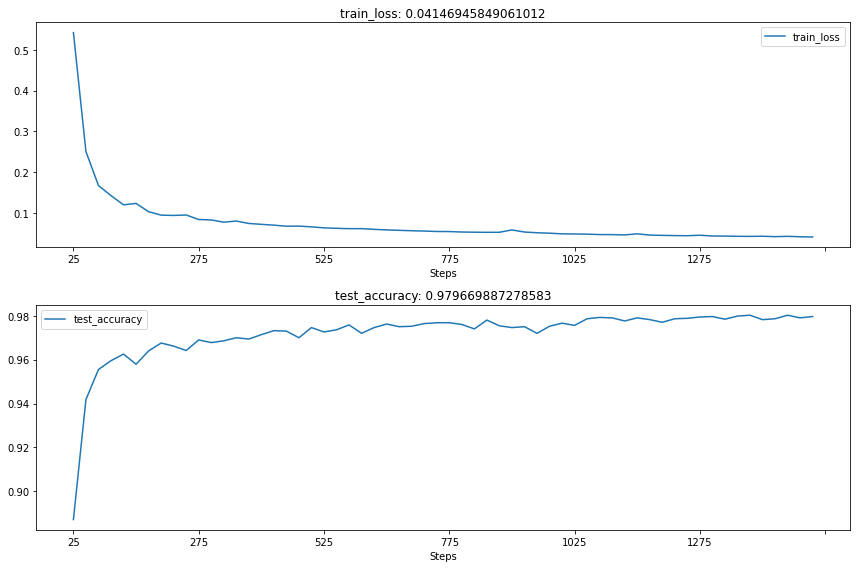

train_loss:0.0415
test_acc:0.9797
best_acc:0.9803
train_acc: 0.992049114331723
acc: [0.9802737520128825]


In [3]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116_percent.csv',header=0)
#划分样本和标签
x=np.array(sample.iloc[:,range(0,96)])#.astype(int)
y=np.array(sample.loc[:,'code']).reshape(-1,1).astype(int)
#训练模型

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

params={
"d1":96,
"hidden_size": 110,
"d2":116,
"learning_rate":0.01,
"epoches":1500,
"weight_decay":0.01
}
acc=[]
for train_index, test_index in skf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #qt
    qt = QuantileTransformer(output_distribution = 'uniform' )
    x_train = qt.fit_transform(x_train)
    x_test = qt.transform(x_test)
    #numpy转为张量
    x_train_tensor=torch.from_numpy(x_train).float().to(device)
    y_train_tensor=torch.from_numpy(y_train).to(device)
    x_test_tensor=torch.from_numpy(x_test).float().to(device)
    y_test_tensor=torch.from_numpy(y_test).to(device)
    train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
    annmodel,best_acc=anntrain(params)
    train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
    print('train_acc:',train_acc)
    acc.append(best_acc)
    print('acc:',acc)
    break

In [14]:
torch.save(annmodel.state_dict(),local_path+'\\blokagedata\\annmodel_hid110.pkl')
# model = TheModelClass(...)
# model.load_state_dict(torch.load('\parameter.pkl'))

In [12]:
# model = TheModelClass(...)
# model.load_state_dict(torch.load('\parameter.pkl'))
pre=run_model(x_test_tensor,annmodel)
pre=torch.argmax(pre,1).unsqueeze(1).cpu().numpy()
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
S=sample.loc[test_index,:]
para=S.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a=a[['index','pred','true','dn','time','bool']]
a.to_csv(local_path+'\\blokagedata\\ann_hid110_test_result.csv',encoding='ascii',index=True)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test.ravel(),pre))
cm.to_csv(local_path+'\\blokagedata\\ann_hid110_cm.csv',encoding='ascii',index=True)

## SVM

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold,cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform,uniform,randint
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#准备文件夹保存数据
local_path=os.getcwd()
if not os.path.exists(local_path+'\\blokagedata'):
    os.mkdir(local_path+'\\blokagedata')
print(local_path+'\\blokagedata')
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)
#划分样本和标签
x=np.array(sample.iloc[:,range(0,96)])#.astype(int)
y=np.array(sample.loc[:,'code']).reshape(-1,1).astype(int)

F:\NBCode\1-Blockage\blokagedata


In [ ]:
param_dist = {'svc__C': [1010000],
 'svc__gamma': [0.02]}
param_dist = {'svc__C': loguniform(1e0, 1e8),
 'svc__gamma': loguniform(1e-3, 1e0)}

In [2]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('svc', SVC(decision_function_shape='ovr',kernel='rbf'))])
param_dist = {'svc__C': [1,10,100,1000,10000,100000,500000,800000,1000000,1200000,1500000],
 'svc__gamma': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.01]}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = GridSearchCV(estimator=pipe,param_grid=param_dist,cv=splitter,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

Fitting 5 folds for each of 110 candidates, totalling 550 fits


In [3]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

网格搜索-度量记录： {'mean_fit_time': array([15.2783309 , 11.51240506,  9.86022382,  8.72027321,  8.21542373,
        7.86236882,  7.64076099,  7.33996491,  7.44169254, 14.89096622,
        6.42122307,  5.71590943,  5.36764112,  5.26850686,  5.26711078,
        5.3644495 ,  5.44922352,  5.28984928,  5.2814714 ,  6.6206892 ,
        4.70660896,  4.71797948,  4.64158349,  4.65415025,  4.73034678,
        4.8893209 ,  4.8763555 ,  4.91584959,  4.97090282,  4.91325665,
        4.51611924,  4.62522783,  4.58712912,  4.8512229 ,  4.74391003,
        4.9098659 ,  4.93719258,  4.97190008,  5.11152635,  4.58214259,
        5.07243118,  5.25294857,  5.25314736,  5.22761607,  5.29603367,
        5.33153772,  5.3951683 ,  5.43266702,  5.47196274,  5.0480957 ,
        6.64243121,  6.29595747,  6.22016072,  5.97561483,  5.88366103,
        5.8036746 ,  5.86909981,  5.75560365,  5.6931706 ,  6.72520986,
        8.2014617 ,  7.29847631,  6.60812373,  6.28418951,  6.00992355,
        5.93273005,  5.90500445,  5

In [4]:
xx=search.cv_results_['param_svc__C'].data.astype(float)
yy=search.cv_results_['param_svc__gamma'].data.astype(float)
zz=search.cv_results_['mean_test_score'].astype(float)
xx=np.expand_dims(xx,axis=1)
yy=np.expand_dims(yy,axis=1)
zz=np.expand_dims(zz,axis=1)
print(xx.shape)
print(yy.shape)
print(zz.shape)
zxc=pd.DataFrame(np.hstack((xx,yy,zz)))
zxc.columns=['C','gamma','acc']
zxc=pd.pivot_table(zxc,index=['C'],columns=['gamma'],values=['acc'])
zxc.to_csv(local_path+'\\blokagedata\\svm_finetune_grid_b.csv',encoding='ascii',index=True)

(110, 1)
(110, 1)
(110, 1)


In [10]:
zxc=pd.DataFrame(np.hstack((xx,yy,zz)))
zxc.columns=['C','gamma','acc']

In [14]:
a=pd.pivot_table(zxc,index=['C'],columns=['gamma'],values=['acc'])

In [15]:
a.to_csv(local_path+'\\blokagedata\\svm_finetune_grid_a.csv',encoding='ascii',index=False)

## RF

In [ ]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('rfc', RandomForestClassifier(criterion='gini',))])
param_dist = {'rfc__n_estimators': randint(10, 500),
 'rfc__min_samples_split': randint(2, 1000),
 'rfc__max_depth': randint(2, 100)}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=10,cv=splitter,random_state=11,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

## KNN

In [2]:
pipe = Pipeline([('scaler', QuantileTransformer(output_distribution = 'uniform')), ('knn', KNeighborsClassifier())])
param_dist = {'knn__n_neighbors': [1,2,3,4,5,6,7,8,9]}
splitter=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
clf = RandomizedSearchCV(estimator=pipe,param_distributions=param_dist,n_iter=9,cv=splitter,random_state=1,n_jobs=-1,scoring='accuracy',verbose=3)
search = clf.fit(x, y.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [3]:
print('网格搜索-度量记录：',search.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',search.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',search.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',search.best_estimator_)  # 获取最佳度量时的分类器模型

网格搜索-度量记录： {'mean_fit_time': array([0.78091383, 0.80125742, 0.99373875, 1.14356465, 0.87585249,
       0.63071332, 0.83117738, 1.26302209, 1.00910134]), 'std_fit_time': array([0.03164887, 0.0129205 , 0.1801537 , 0.04063109, 0.19028051,
       0.31640862, 0.32353559, 0.17179595, 0.19318473]), 'mean_score_time': array([31.96349292, 23.43671041, 31.30537581, 25.62793326, 17.07385473,
        7.51042676,  7.51011128,  6.77048931,  4.40521331]), 'std_score_time': array([16.89933086,  0.83386042, 11.19726379,  2.83026299, 12.45782324,
        0.5610154 ,  0.51962969,  0.56653946,  0.3424864 ]), 'param_knn__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'knn__n_neighbors': 1}, {'knn__n_neighbors': 2}, {'knn__n_neighbors': 3}, {'knn__n_neighbors': 4}, {'knn__n_neighbors': 5}, {'knn__n_neighbors': 6}, {'knn__n_neighbors

In [7]:
xx=search.cv_results_['param_knn__n_neighbors'].data.astype(float)
zz=search.cv_results_['mean_test_score'].astype(float)
xx=np.expand_dims(xx,axis=1)
zz=np.expand_dims(zz,axis=1)
print(xx.shape)
print(zz.shape)
zxc=pd.DataFrame(np.hstack((xx,zz)))
zxc.columns=['k','acc']
# zxc=pd.pivot_table(zxc,index=['C'],columns=['gamma'],values=['acc'])
# zxc.to_csv(local_path+'\\blokagedata\\svm_finetune_grid_b.csv',encoding='ascii',index=True)

(9, 1)
(9, 1)


# 思路4（116）

In [ ]:
只训练一部分，测试另一部分

## ANN

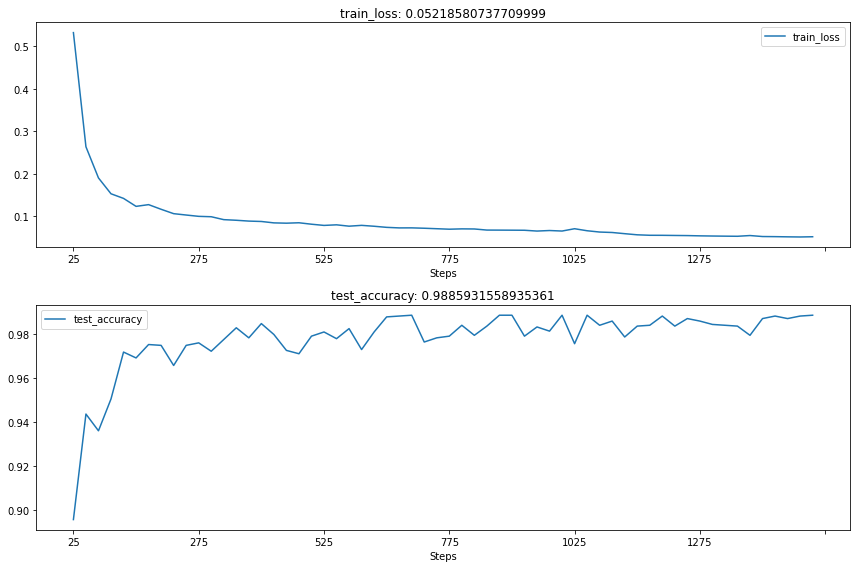

train_loss:0.0522
test_acc:0.9886
best_acc:0.9886
train_acc: 0.9890589824403422


In [24]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)
#划分样本和标签
s1=sample.iloc[np.where(sample.loc[:,'dn']==1)[0],:]
s2=sample.iloc[np.where(sample.loc[:,'dn']==2)[0],:]
s3=sample.iloc[np.where(sample.loc[:,'dn']==3)[0],:]
s4=sample.iloc[np.where(sample.loc[:,'dn']==4)[0],:]
s5=sample.iloc[np.where(sample.loc[:,'dn']==5)[0],:]
s6=sample.iloc[np.where(sample.loc[:,'dn']==6)[0],:]
s7=sample.iloc[np.where(sample.loc[:,'dn']==7)[0],:]
s8=sample.iloc[np.where(sample.loc[:,'dn']==8)[0],:]
s9=sample.iloc[np.where(sample.loc[:,'dn']==9)[0],:]

s_train=pd.concat([s2,s3,s4,s5,s6,s7,s8,s9],axis=0)
x_train=np.array(s_train.iloc[:,range(0,96)])

s_test=pd.concat([s1],axis=0)
x_test=np.array(s_test.iloc[:,range(0,96)])

y_train=np.array(s_train.loc[:,'code']).reshape(-1,1).astype(int)
y_test=np.array(s_test.loc[:,'code']).reshape(-1,1).astype(int)

qt = QuantileTransformer(output_distribution = 'uniform' )
x_train = qt.fit_transform(x_train)
x_test = qt.transform(x_test)
#numpy转为张量
x_train_tensor=torch.from_numpy(x_train).float().to(device)
y_train_tensor=torch.from_numpy(y_train).to(device)
x_test_tensor=torch.from_numpy(x_test).float().to(device)
y_test_tensor=torch.from_numpy(y_test).to(device)
train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
#训练模型
params={
"d1":96,
"hidden_size": 110,
"d2":116,
"learning_rate":0.01,
"epoches":1500,
"weight_decay":0.01
}
annmodel,best_acc=anntrain(params)
train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
print('train_acc:',train_acc)

In [25]:
pre=run_model(x_test_tensor,annmodel)
pre=torch.argmax(pre,1).unsqueeze(1).cpu().numpy()
bool1=np.ones([len(pre),1])
bool1[np.where(pre.ravel()!=y_test.ravel())]=0
pred=pd.DataFrame(pre)
para=s_test.iloc[:,range(96,99)].reset_index()
bool2=pd.DataFrame(bool1.astype(int))
a=pd.concat([pred,para,bool2],axis=1,ignore_index=True)
a.columns=['pred','index','true','dn','time','bool']
a=a[['index','pred','true','dn','time','bool']]
a.to_csv(local_path+'\\blokagedata\\ann_test1.csv',encoding='ascii',index=True)

# 思路5（116）

In [ ]:
只训练一组，其余测试

## ANN

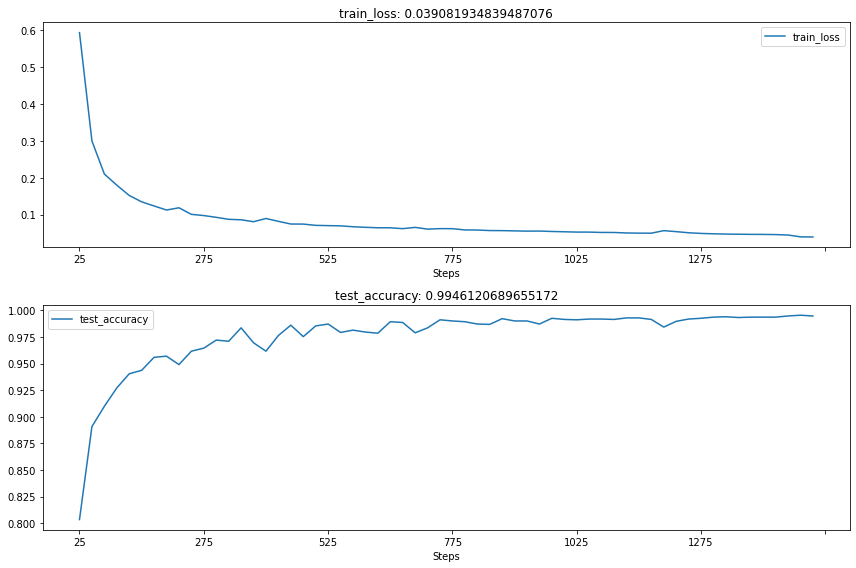

train_loss:0.0391
test_acc:0.9946
best_acc:0.9953
train_acc: 0.9929273555502277


In [62]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)
#划分样本和标签
s1=sample.iloc[np.where(sample.loc[:,'dn']==1)[0],:]
s2=sample.iloc[np.where(sample.loc[:,'dn']==2)[0],:]
s3=sample.iloc[np.where(sample.loc[:,'dn']==3)[0],:]
s4=sample.iloc[np.where(sample.loc[:,'dn']==4)[0],:]
s5=sample.iloc[np.where(sample.loc[:,'dn']==5)[0],:]
s6=sample.iloc[np.where(sample.loc[:,'dn']==6)[0],:]
s7=sample.iloc[np.where(sample.loc[:,'dn']==7)[0],:]
s8=sample.iloc[np.where(sample.loc[:,'dn']==8)[0],:]
s9=sample.iloc[np.where(sample.loc[:,'dn']==9)[0],:]

s_train=pd.concat([s3,s6,s9],axis=0)
x_train=np.array(s_train.iloc[:,range(0,96)])

s_test=pd.concat([s9],axis=0)
x_test=np.array(s_test.iloc[:,range(0,96)])

y_train=np.array(s_train.loc[:,'code']).reshape(-1,1).astype(int)
y_test=np.array(s_test.loc[:,'code']).reshape(-1,1).astype(int)

qt = QuantileTransformer(output_distribution = 'uniform' )
x_train = qt.fit_transform(x_train)
x_test = qt.transform(x_test)
#numpy转为张量
x_train_tensor=torch.from_numpy(x_train).float().to(device)
y_train_tensor=torch.from_numpy(y_train).to(device)
x_test_tensor=torch.from_numpy(x_test).float().to(device)
y_test_tensor=torch.from_numpy(y_test).to(device)
train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
#训练模型
params={
"d1":96,
"hidden_size": 110,
"d2":116,
"learning_rate":0.01,
"epoches":1500,
"weight_decay":0.01
}
annmodel,best_acc=anntrain(params)
train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
print('train_acc:',train_acc)

In [63]:
for i in [s1,s2,s3,s4,s5,s6,s7,s8,s9]:
    s_test=pd.concat([i],axis=0)
    x_test=np.array(s_test.iloc[:,range(0,96)])
    x_test = qt.transform(x_test)

    y_test=np.array(s_test.loc[:,'code']).reshape(-1,1).astype(int)
    x_test_tensor=torch.from_numpy(x_test).float().to(device)
    y_test_tensor=torch.from_numpy(y_test).to(device)
    test_acc=score_model(x_test_tensor,y_test_tensor,annmodel)
    print('test_acc:',test_acc)

test_acc: 0.9642585551330799
test_acc: 0.985096328607779
test_acc: 0.9906508450197771
test_acc: 0.9852198990627253
test_acc: 0.9831056793673616
test_acc: 0.9935181850918257
test_acc: 0.9629496402877697
test_acc: 0.9579288025889967
test_acc: 0.9946120689655172


# 思路6（9）

In [ ]:
识别不同程度

## ANN

In [30]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)

In [31]:
s=np.array(sample)

In [32]:
for i in range(1,10):
    s[np.where(sample.loc[:,'dn']==i),97]=i-1

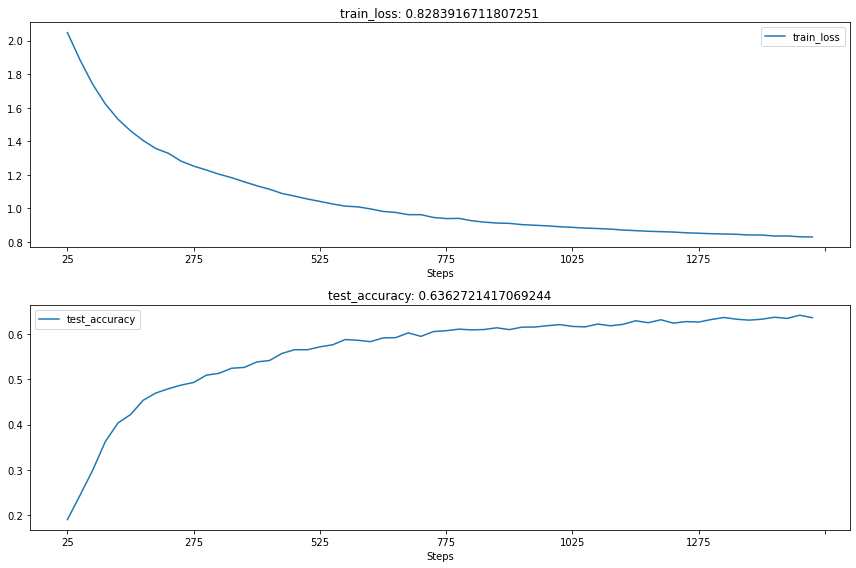

train_loss:0.8284
test_acc:0.6363
best_acc:0.6417
train_acc: 0.6901167471819646
acc: [0.6378824476650563, 0.6276167471819646, 0.6529790660225443, 0.6417069243156199]


  2%|▏         | 25/1500 [00:04<04:45,  5.16it/s]


KeyboardInterrupt: 

In [36]:
#读取模型数据
sample=pd.read_csv(local_path+'\\blokagedata\\Sample_116.csv',header=0)
#划分样本和标签
x=s[:,range(0,96)]#.astype(int)
y=s[:,97].reshape(-1,1).astype(int)
#训练模型

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
score_record=[]
hs_record=[]
for hs in range(100,300,10):
    params={
    "d1":96,
    "hidden_size": hs,
    "d2":9,
    "learning_rate":0.01,
    "epoches":1500,
    "weight_decay":0.01
    }
    acc=[]
    for train_index, test_index in skf.split(x,y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #qt
        qt = QuantileTransformer(output_distribution = 'uniform' )
        x_train = qt.fit_transform(x_train)
        x_test = qt.transform(x_test)
        #numpy转为张量
        x_train_tensor=torch.from_numpy(x_train).float().to(device)
        y_train_tensor=torch.from_numpy(y_train).to(device)
        x_test_tensor=torch.from_numpy(x_test).float().to(device)
        y_test_tensor=torch.from_numpy(y_test).to(device)
        train_data=Data.TensorDataset(x_train_tensor,y_train_tensor.long().squeeze())
        annmodel,best_acc=anntrain(params)
        train_acc=score_model(x_train_tensor,y_train_tensor,annmodel)
        print('train_acc:',train_acc)
        acc.append(best_acc)
        print('acc:',acc)
    ave_score=np.mean(acc)
    print('ave_acc',ave_score)
    score_record.append(ave_score)
    hs_record.append(hs)
    print('score_record:',score_record)
    print('hs_record:',hs_record)